Social Network Analysis II
- Visualize the network data
- Show the top five node labels with highest Between Centrality. 
- Show the top five node labels with other two centrality measures:  Eigenvector Centrality and Degree Centrality
- So what measure (among the above) should we use to determine network influencer?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#load the data
fb_G=nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

(-0.9949358621239662,
 1.1895640411972999,
 -1.0544490027427673,
 0.5725293564796448)

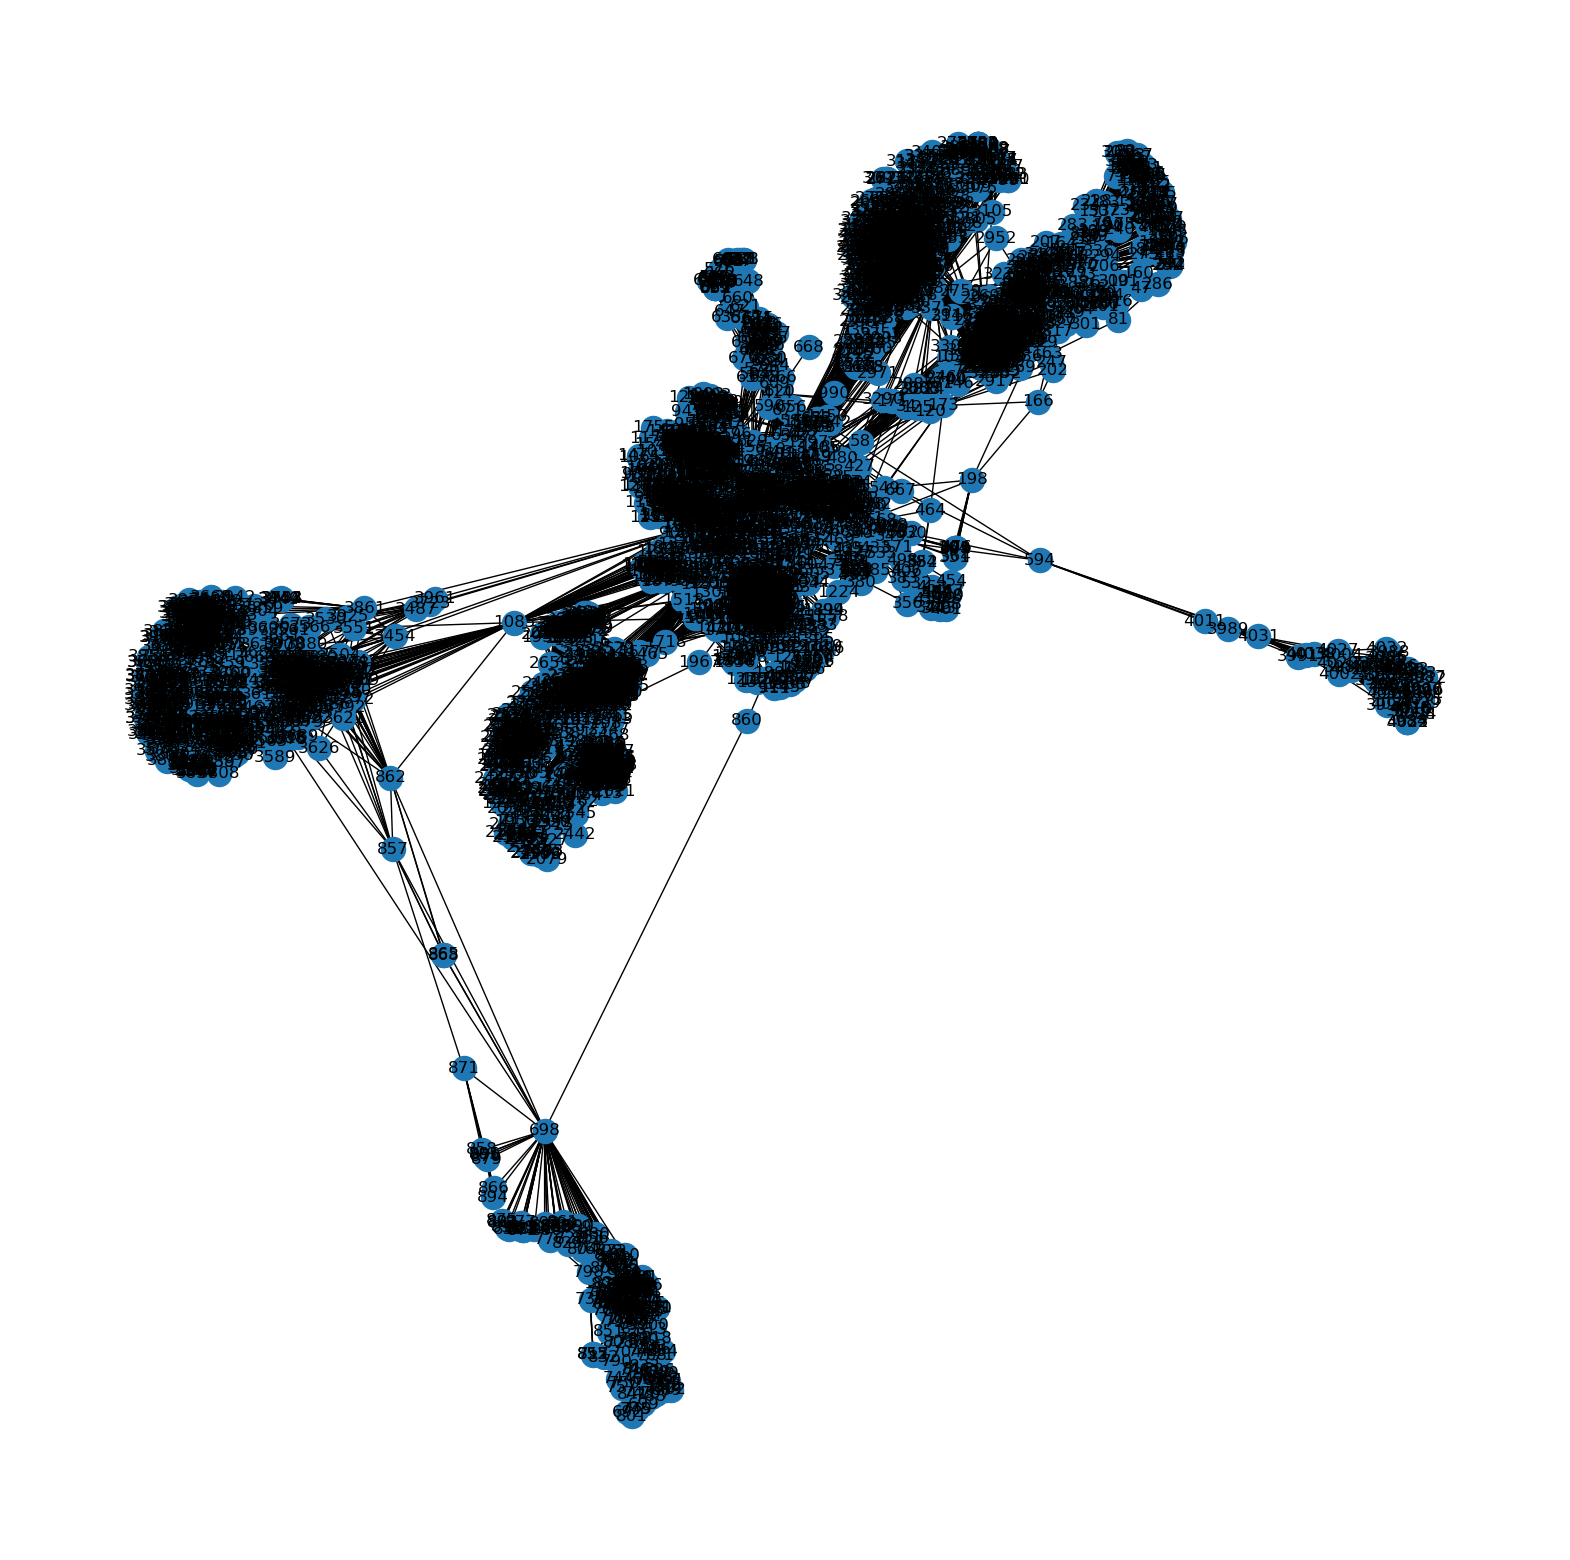

In [3]:
#visualize it
plt.figure(figsize=(20,20))
nx.draw_networkx(fb_G);
plt.axis('off')

1.b. A much better visualization that shows centrality and node degree

(-0.7381290540099144,
 1.1651615843176841,
 -0.6179780821502209,
 0.4709201614558697)

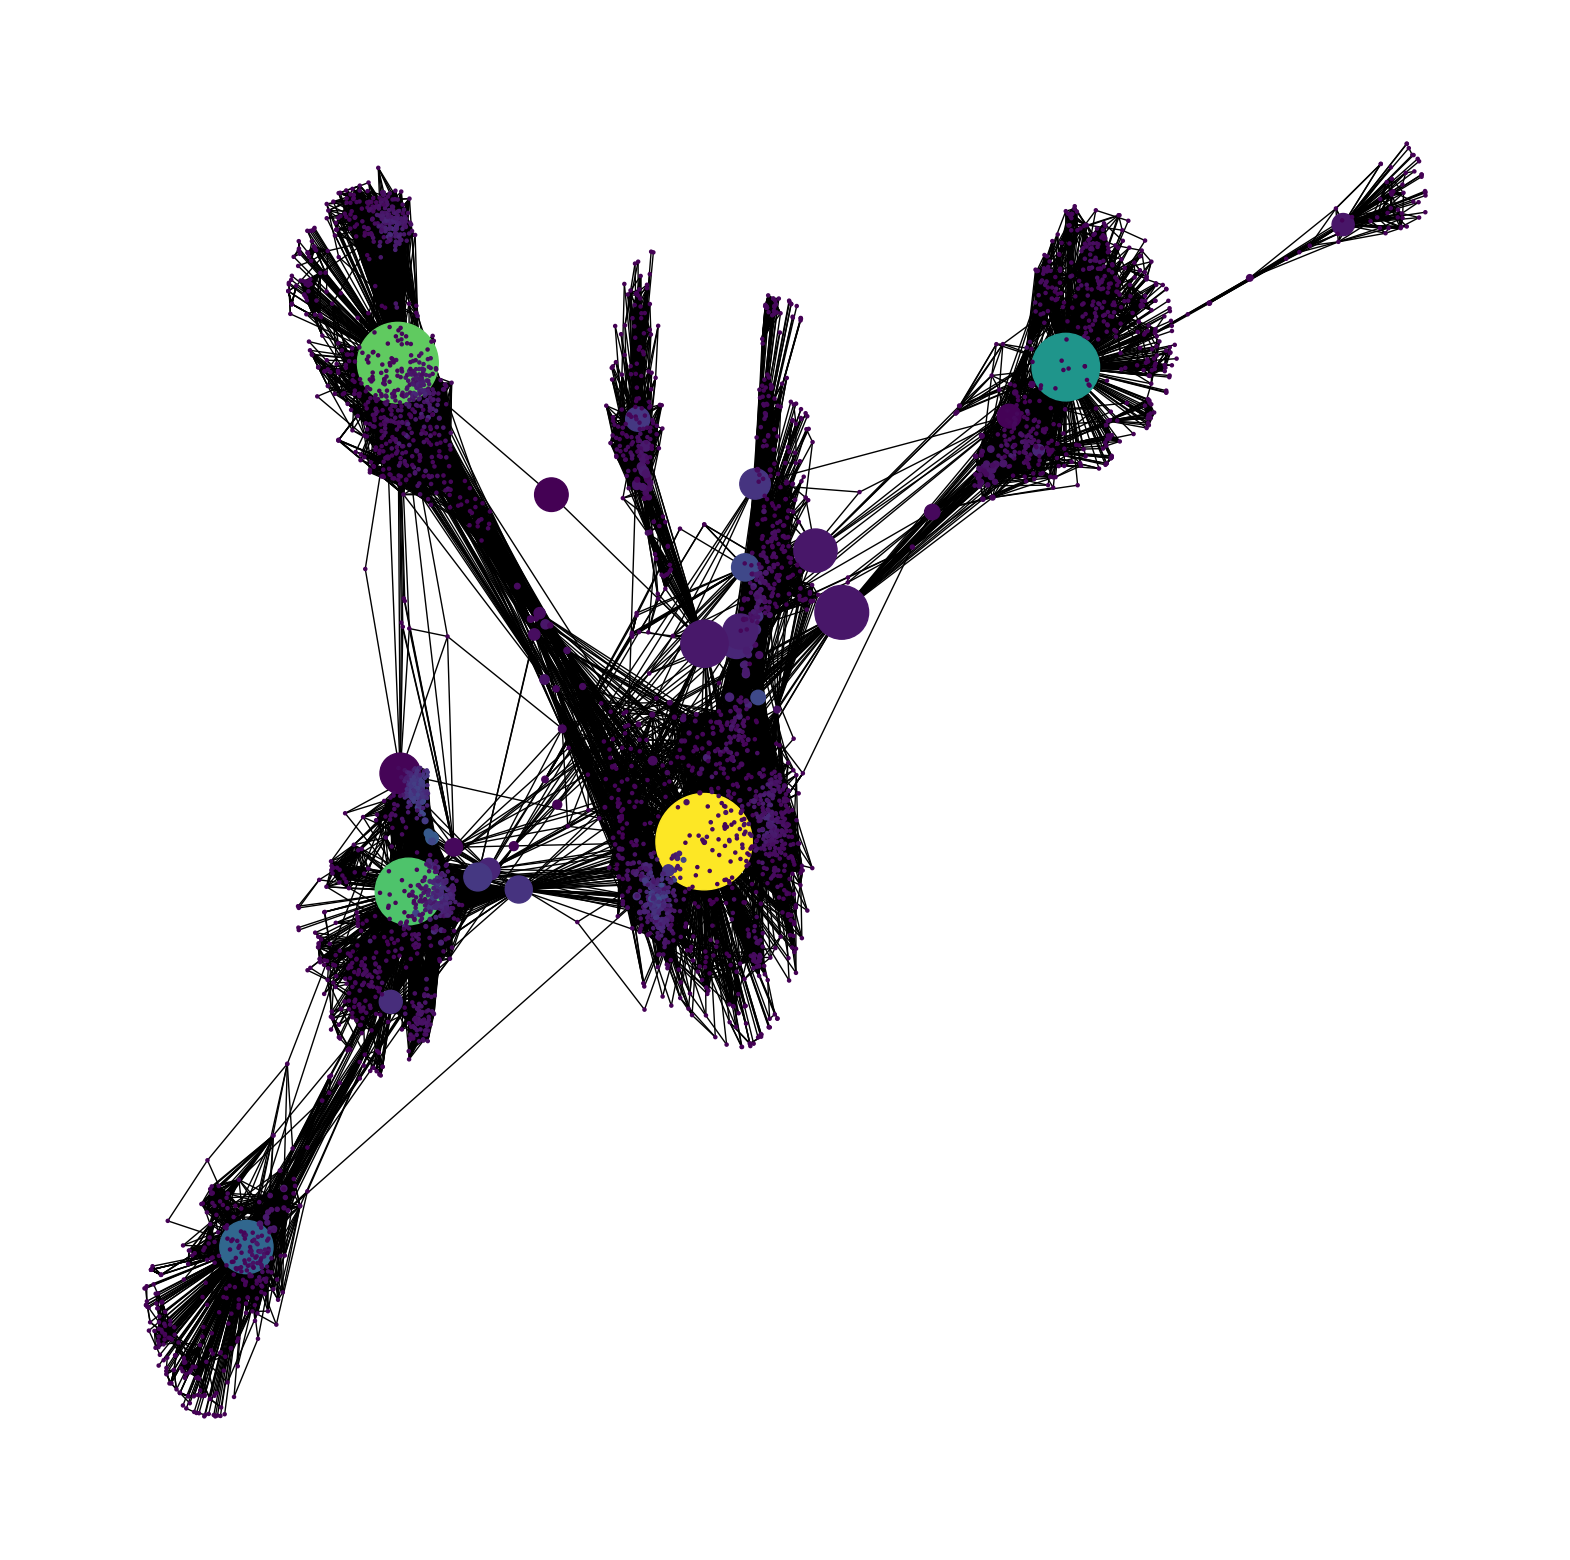

In [4]:
# Spring_Layout: a popular algorithm to position nodes
pos = nx.spring_layout(fb_G)

# Vary node size by betweenness centrality 
betCent = nx.betweenness_centrality(fb_G, normalized=True, endpoints=True)
#a simple loop to define the size of each node based on centrality
node_size =  [v * 10000 for v in betCent.values()]

# Vary color by node degree
node_color = [20000.0 * fb_G.degree(v) for v in fb_G]

#Plot the network
plt.figure(figsize=(20,20))
nx.draw_networkx(fb_G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

2. Top five node labels with highest Betweenness Centrality

In [5]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

3. a. Top five node labels with highest Eigenvector Centrality

In [6]:
eigenCent=nx.eigenvector_centrality(fb_G)
sorted(eigenCent, key=eigenCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]

3. b. Top five node labels with highest Degree Centrality

In [7]:
degCent=nx.degree_centrality(fb_G)
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

4. So what measure (among the above) should we use to determine network influencer?

Eigenvector centrality is an enhanced version of degree centrality. A large Eigenvector indicates this node 1) has connected to a large number of nodes, or 2) has connected to important neighbors, or both 1) and 2). From this perspective, eigenvector centrality serves as a strong indicator of a node’s influence within a network. 
On the other hand, betweenness centrality measures how often a node lies on the shortest paths between other nodes. It does not focus on the number of nodes it's connected to, unlike either degree or eigenvector centrality. Rather, it is a good indicator of network influencer about how much a node falls between others or controls flows between others.

So, If we want influencers who are both well-connected and connected to other powerful nodes, Eigenvector Centrality is usually the best all-around measure. But if our goal is to Identify strategic positions for control or disruption we should use betweenness centrality.

